In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [2]:
# Load the data
df = pd.read_csv('../datasets/target_model/CICIDS2017/target_model_CICIDS2017data.csv') #datasets\substitute_model\CICIDS2017\df_substitute_0311.csv
df = df.drop(columns=['Label'])
# modify column names Binary class to "Label"
df = df.rename(columns={'binary_classification': 'Label'})
df


,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMin,FwdPktLenStd,BwdPktLenMax,BwdPktLenMean,BwdPktLenStd,...,SubflowFwdPkts,SubflowFwdByts,IdleStd,SubflowBwdPkts,SubflowBwdByts,InitBwdWinByts,FwdActDataPkts,ActiveStd,ActiveMax,Label
0,217,2,2,102,2,51,0.000000,112,112.000000,0.000000,...,2,102,0.0,2,224,-1,1,0.000,0,benign
1,244,2,0,12,0,6,0.000000,0,0.000000,0.000000,...,2,12,0.0,0,0,-1,1,0.000,0,benign
2,6390212,8,10,762,10,0,165.775020,1460,663.600000,708.052760,...,8,762,0.0,10,6636,31088,7,0.000,161670,benign
3,4433715,15,13,5436,13,0,466.892585,4064,720.230769,1136.644122,...,15,5436,0.0,13,9363,8,7,0.000,0,benign
4,5460628,3,1,0,1,0,0.000000,0,0.000000,0.000000,...,3,0,0.0,1,0,26580,0,0.000,0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120419,102645877,14,3,2541,3,0,98.363337,6,2.000000,3.464102,...,14,2541,18800000.0,3,6,0,11,4529979.892,6406845,malicious
120420,3003648,3,0,0,0,0,0.000000,0,0.000000,0.000000,...,3,0,0.0,0,0,-1,0,0.000,0,malicious
120421,3003925,3,0,0,0,0,0.000000,0,0.000000,0.000000,...,3,0,0.0,0,0,-1,0,0.000,0,malicious
120422,102690607,14,3,2541,3,0,98.363337,6,2.000000,3.464102,...,14,2541,18800000.0,3,6,0,11,4532998.530,6411372,malicious


In [3]:
# change df column name
df.columns = df.columns.str.strip()
df.columns 

Index(['FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts',
       'TotLenBwdPkts', 'FwdPktLenMin', 'FwdPktLenStd', 'BwdPktLenMax',
       'BwdPktLenMean', 'BwdPktLenStd', 'FlowByts/s', 'FlowPkts/s',
       'FlowIATStd', 'FwdIATTot', 'FwdIATMean', 'FwdIATMax', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'BwdPSHFlags', 'FwdHeaderLen',
       'BwdHeaderLen', 'FwdPkts/s', 'BwdPkts/s', 'PktLenMax', 'PktLenStd',
       'FINFlagCnt', 'SYNFlagCnt', 'ACKFlagCnt', 'Down/UpRatio',
       'BwdSegSizeAvg', 'FwdHeaderLen.1', 'SubflowFwdPkts', 'SubflowFwdByts',
       'IdleStd', 'SubflowBwdPkts', 'SubflowBwdByts', 'InitBwdWinByts',
       'FwdActDataPkts', 'ActiveStd', 'ActiveMax', 'Label'],
      dtype='object')

In [4]:
# map df columns name to assigned column name
df.columns = ['FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts', 'TotLenBwdPkts', 'FwdPktLenMin', 'FwdPktLenStd', 'BwdPktLenMax', 'BwdPktLenMean'
                ,'BwdPktLenStd', 'FlowByts/s', 'FlowPkts/s', 'FlowIATStd', 'FwdIATTot', 'FwdIATMean', 'FwdIATMax', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax'
                , 'BwdIATMin', 'BwdPSHFlags', 'FwdHeaderLen', 'BwdHeaderLen', 'FwdPkts/s', 'BwdPkts/s', 'PktLenMax', 'PktLenStd', 'FINFlagCnt', 
                'SYNFlagCnt', 'ACKFlagCnt', 'Down/UpRatio', 'BwdSegSizeAvg', 'FwdHeaderLen.1', 'SubflowFwdPkts', 'SubflowFwdByts', 'SubflowBwdPkts', 'SubflowBwdByts'
                ,'InitBwdWinByts', 'FwdActDataPkts', 'ActiveStd', 'ActiveMax', 'IdleStd', 'Label']


In [5]:
# df change column to another 35 th column
df = df[list(('FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts',
       'TotLenBwdPkts', 'FwdPktLenMin', 'FwdPktLenStd', 'BwdPktLenMax',
       'BwdPktLenMean', 'BwdPktLenStd', 'FlowByts/s', 'FlowPkts/s',
       'FlowIATStd', 'FwdIATTot', 'FwdIATMean', 'FwdIATMax', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'BwdPSHFlags', 'FwdHeaderLen',
       'BwdHeaderLen', 'FwdPkts/s', 'BwdPkts/s', 'PktLenMax', 'PktLenStd',
       'FINFlagCnt', 'SYNFlagCnt', 'ACKFlagCnt', 'Down/UpRatio',
       'BwdSegSizeAvg', 'FwdHeaderLen.1', 'SubflowFwdPkts', 'SubflowFwdByts',
       'IdleStd', 'SubflowBwdPkts', 'SubflowBwdByts', 'InitBwdWinByts',
       'FwdActDataPkts', 'ActiveStd', 'ActiveMax', 'Label'))]

In [6]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df ['Label'] = lb.fit_transform(df['Label'])

In [7]:
# load the model from disk
dt_filename = '../target_model/ml_model/CICIDS2018target_dt.pickle' # Linear Regression
rf_filename = '../target_model/ml_model/CICIDS2018target_randomforest.pickle' # Decision Tree
xgb_filename = '../target_model/ml_model/CICIDS2018target_xgb.pickle' # xgboost
lr_filename = '../target_model/ml_model/CICIDS2018target_lr.pickle' # Linear Regression

dt_model = pickle.load(open(dt_filename, 'rb'))
rf_model = pickle.load(open(rf_filename, 'rb'))
xgb_model = pickle.load(open(xgb_filename, 'rb'))
lr_model = pickle.load(open(lr_filename, 'rb'))

### Generate Label from decision tree

In [8]:
from sklearn.preprocessing import MinMaxScaler
# generate predictions

y_test_dt = df['Label']
X_test_dt = df.drop(['Label'], axis=1)


y_test_dt_predicted = dt_model.predict(X_test_dt)
print("Classification report: \n", classification_report(y_test_dt, y_test_dt_predicted, target_names=['Benign', 'Malicious'], digits=4))

Classification report: 
               precision    recall  f1-score   support

      Benign     0.9630    0.8241    0.8881    104753
   Malicious     0.4013    0.7881    0.5318     15671

    accuracy                         0.8194    120424
   macro avg     0.6821    0.8061    0.7100    120424
weighted avg     0.8899    0.8194    0.8418    120424



In [9]:
X_test_dt.columns

Index(['FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts',
       'TotLenBwdPkts', 'FwdPktLenMin', 'FwdPktLenStd', 'BwdPktLenMax',
       'BwdPktLenMean', 'BwdPktLenStd', 'FlowByts/s', 'FlowPkts/s',
       'FlowIATStd', 'FwdIATTot', 'FwdIATMean', 'FwdIATMax', 'BwdIATMean',
       'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'BwdPSHFlags', 'FwdHeaderLen',
       'BwdHeaderLen', 'FwdPkts/s', 'BwdPkts/s', 'PktLenMax', 'PktLenStd',
       'FINFlagCnt', 'SYNFlagCnt', 'ACKFlagCnt', 'Down/UpRatio',
       'BwdSegSizeAvg', 'FwdHeaderLen.1', 'SubflowFwdPkts', 'SubflowFwdByts',
       'IdleStd', 'SubflowBwdPkts', 'SubflowBwdByts', 'InitBwdWinByts',
       'FwdActDataPkts', 'ActiveStd', 'ActiveMax'],
      dtype='object')

In [10]:
df_dt = pd.concat([df, pd.DataFrame(y_test_dt_predicted, columns=['DT_Predicted'])], axis=1)
df_dt.to_csv('../surrogate_model/data_for_training/df_dt_predicted_0313.csv', index=False)

In [11]:
df_dt

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMin,FwdPktLenStd,BwdPktLenMax,BwdPktLenMean,BwdPktLenStd,...,SubflowFwdByts,IdleStd,SubflowBwdPkts,SubflowBwdByts,InitBwdWinByts,FwdActDataPkts,ActiveStd,ActiveMax,Label,DT_Predicted
0,217,2,2,102,2,51,0.000000,112,112.000000,0.000000,...,102,0,0.0,2,224,-1,1,0.000,0,0
1,244,2,0,12,0,6,0.000000,0,0.000000,0.000000,...,12,0,0.0,0,0,-1,1,0.000,0,0
2,6390212,8,10,762,10,0,165.775020,1460,663.600000,708.052760,...,762,161670,0.0,10,6636,31088,7,0.000,0,1
3,4433715,15,13,5436,13,0,466.892585,4064,720.230769,1136.644122,...,5436,0,0.0,13,9363,8,7,0.000,0,1
4,5460628,3,1,0,1,0,0.000000,0,0.000000,0.000000,...,0,0,0.0,1,0,26580,0,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120419,102645877,14,3,2541,3,0,98.363337,6,2.000000,3.464102,...,2541,6406845,18800000.0,3,6,0,11,4529979.892,1,1
120420,3003648,3,0,0,0,0,0.000000,0,0.000000,0.000000,...,0,0,0.0,0,0,-1,0,0.000,1,0
120421,3003925,3,0,0,0,0,0.000000,0,0.000000,0.000000,...,0,0,0.0,0,0,-1,0,0.000,1,0
120422,102690607,14,3,2541,3,0,98.363337,6,2.000000,3.464102,...,2541,6411372,18800000.0,3,6,0,11,4532998.530,1,1


### Generate Label from randomforest

In [12]:
# generate predictions

y_test_rf = df['Label']
X_test_rf = df.drop(['Label'], axis=1)
y_test_rf_predicted = rf_model.predict(X_test_rf)
print("Classification report: \n", classification_report(y_test_rf, y_test_rf_predicted, target_names=['Benign', 'Malicious'], digits=4))

Classification report: 
               precision    recall  f1-score   support

      Benign     0.9436    0.9949    0.9685    104753
   Malicious     0.9462    0.6022    0.7360     15671

    accuracy                         0.9438    120424
   macro avg     0.9449    0.7985    0.8523    120424
weighted avg     0.9439    0.9438    0.9383    120424



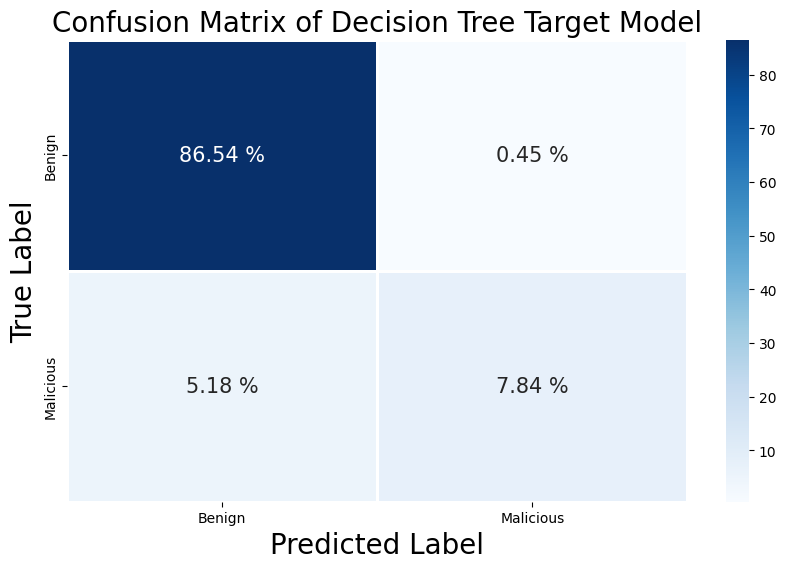

In [13]:
cm = confusion_matrix(y_test_rf, y_test_rf_predicted, labels=rf_model.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Decision Tree Target Model', fontsize=20)
plt.show()

In [14]:
df_rf = pd.concat([df, pd.DataFrame(y_test_rf_predicted, columns=['RF_Predicted'])], axis=1)
df_rf.to_csv('../surrogate_model/data_for_training/df_rf_predicted_0313.csv', index=False)

### Generate Label from xgboost

In [15]:
# generate predictions

y_test_xgb = df['Label']
X_test_xgb = df.drop(['Label'], axis=1)
y_test_xgb_predicted = xgb_model.predict(X_test_xgb)
print("Classification report: \n", classification_report(y_test_xgb, y_test_xgb_predicted, target_names=['Benign', 'Malicious'], digits=4))

Classification report: 
               precision    recall  f1-score   support

      Benign     0.9173    0.9878    0.9513    104753
   Malicious     0.8323    0.4050    0.5449     15671

    accuracy                         0.9120    120424
   macro avg     0.8748    0.6964    0.7481    120424
weighted avg     0.9063    0.9120    0.8984    120424



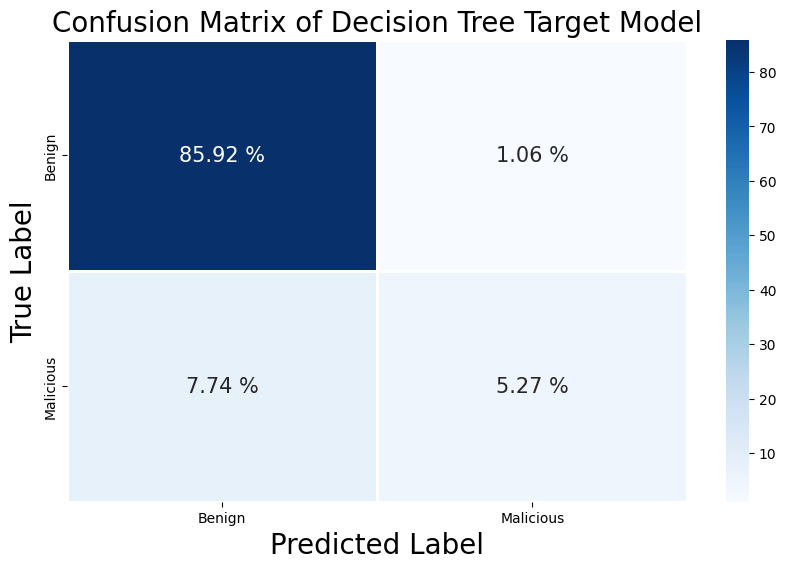

In [16]:
cm = confusion_matrix(y_test_xgb, y_test_xgb_predicted, labels=xgb_model.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Decision Tree Target Model', fontsize=20)
plt.show()

In [17]:
df_rf = pd.concat([df, pd.DataFrame(y_test_rf_predicted, columns=['XGB_Predicted'])], axis=1)
df_rf.to_csv('../surrogate_model/data_for_training/df_xgb_predicted_0313.csv', index=False)

### Generate Label from Logisitic Regression

In [18]:
# generate predictions

y_test_lr = df['Label']
X_test_lr = df.drop(['Label'], axis=1)
y_test_lr_predicted = lr_model.predict(X_test_lr)
print("Classification report: \n", classification_report(y_test_lr, y_test_lr_predicted, target_names=['Benign', 'Malicious'], digits=4))

Classification report: 
               precision    recall  f1-score   support

      Benign     0.9508    0.9515    0.9512    104753
   Malicious     0.6743    0.6709    0.6726     15671

    accuracy                         0.9150    120424
   macro avg     0.8125    0.8112    0.8119    120424
weighted avg     0.9148    0.9150    0.9149    120424



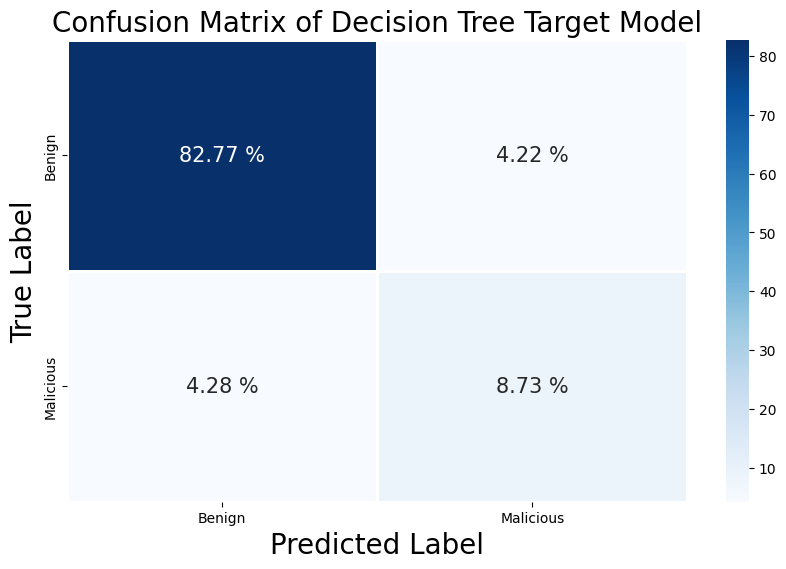

In [19]:
cm = confusion_matrix(y_test_lr, y_test_lr_predicted, labels=lr_model.classes_)
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of Decision Tree Target Model', fontsize=20)
plt.show()

In [20]:
df_rf = pd.concat([df, pd.DataFrame(y_test_rf_predicted, columns=['LR_Predicted'])], axis=1)
df_rf.to_csv('../surrogate_model/data_for_training/df_lr_predicted_0313.csv', index=False)

### Generate Label from DNN

In [21]:
# generate label for DNN
X_test = df.drop(['Label'], axis=1)
y_test = df['Label']
X_test_dnn, y_test_dnn = np.array(X_test), np.array(y_test)

In [22]:
## create dataloaders by myself
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


test_dataset = ClassifierDataset(torch.tensor(X_test_dnn).float(), torch.tensor(y_test_dnn).long())
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [23]:
import torch
import torchvision

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

###################### OUTPUT ######################
cuda:0

cpu


In [24]:
from torch import nn

class MaliciousClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MaliciousClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_4 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.batchnorm4 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        #x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        #x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [25]:
# load the model from disk

num_feature = 42
num_class = 2
model = MaliciousClassification(num_feature, num_class)
model.load_state_dict(torch.load('../target_model/target_DNN_model/binaryclass/targetDNN_model_20240314_004541_50')) #target_model\target_DNN_model\binaryclass\targetDNN_model_20240312_170639_50.pt

y_pred_list_dnn = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred_dnn = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred_dnn, dim = 1)
        #print(_, y_pred_tags.cpu().numpy())
        y_pred_list_dnn.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list_dnn]

In [26]:
# test accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred_list_dnn))

0.9252391549857172


In [27]:
y_test = y_test
print(classification_report(y_test, y_pred_list_dnn, target_names=['Benign', 'Malicious'], digits=4))

              precision    recall  f1-score   support

      Benign     0.9623    0.9513    0.9568    104753
   Malicious     0.6977    0.7509    0.7233     15671

    accuracy                         0.9252    120424
   macro avg     0.8300    0.8511    0.8400    120424
weighted avg     0.9279    0.9252    0.9264    120424



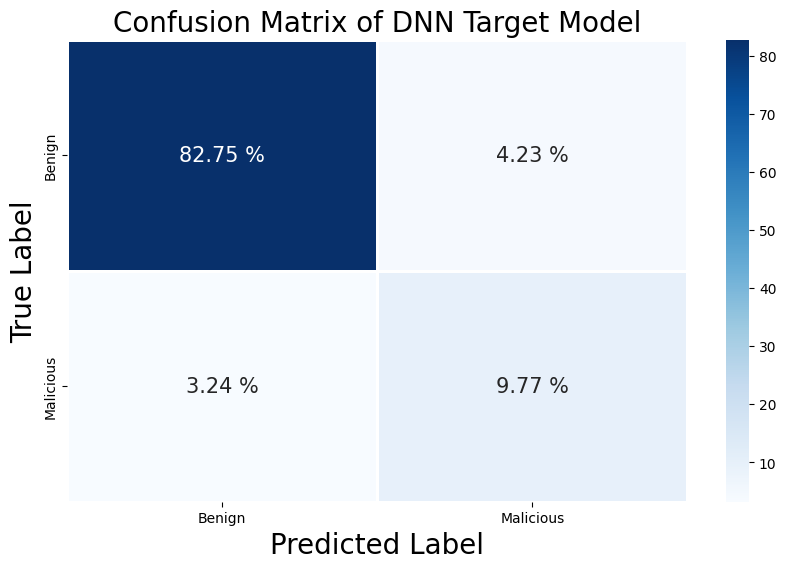

In [28]:
cm = confusion_matrix(y_test, y_pred_list_dnn, labels=df['Label'].unique() )
total = np.sum(cm)
confusion_percentage = (cm  / total) * 100

strings = np.asarray([['%', '%'],
                    ['%', '%']])
labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
plt.figure(figsize=(10,6))
sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 15})
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.title('Confusion Matrix of DNN Target Model', fontsize=20)
plt.show()

In [29]:
df_dnn = pd.concat([df, pd.DataFrame(y_pred_list_dnn, columns=['DNN_Predicted'])], axis=1)
df_dnn.to_csv('../surrogate_model/data_for_training/df_dnn_predicted_0313.csv', index=False)